In [13]:
import pandas as pd
import numpy as np
import psycopg2

In [14]:
db_params= {'host' : 'localhost',
            'user':'postgres',
            'password':'postgres',
            'database':'mydatabase'}
try:
    conn = psycopg2.connect(**db_params)
except psycopg2.Error as e:
        print("Error connecting to PostgreSQL:", e)

else:
    print('Database Connected!!')
    cursor = conn.cursor()

Database Connected!!


In [15]:
cursor.execute('select * from road_links')
result = cursor.fetchall()
result

[(5942213, nan, '{}'),
 (718561991, 0.0, '{"(13.8001,100.69364)","(13.80072,100.6942)"}'),
 (718561992,
  0.0,
  '{"(13.85266,100.8593)","(13.85252,100.8594)","(13.8525,100.85947)","(13.85249,100.85954)","(13.85253,100.85962)","(13.85266,100.8597)","(13.85275,100.85969)"}'),
 (718561993, 0.0, '{"(13.7609,100.58701)","(13.76099,100.58703)"}'),
 (718561994,
  0.0,
  '{"(13.68779,100.3846)","(13.68789,100.38517)","(13.68793,100.38526)","(13.68797,100.38528)","(13.68805,100.38528)","(13.68837,100.38523)"}'),
 (718561998,
  0.0,
  '{"(13.88532,100.62725)","(13.88544,100.62843)","(13.88547,100.62846)","(13.88581,100.62846)"}'),
 (718562004, 0.0, '{"(16.23585,99.69508)","(16.23591,99.69527)"}'),
 (718562009,
  0.0,
  '{"(13.747,100.57356)","(13.74709,100.57358)","(13.74721,100.57358)"}'),
 (718562011, 0.0, '{"(13.6897,100.63705)","(13.6897,100.63777)"}'),
 (718562012, 0.0, '{"(13.74183,100.34576)","(13.74204,100.34763)"}'),
 (718562013, 1.0, '{"(13.71929,100.4906)","(13.71975,100.49076)"}'),


In [16]:
df = pd.DataFrame()
road_id = []
direction = []
Polyline = []
for row in range(len(result)):
    road_id.append(result[row][0])
    direction.append(result[row][1])
    Polyline.append(result[row][2])
df['Road_ID'] = road_id
df['Direction'] = direction
df['Polyline'] = Polyline

In [17]:
import matplotlib.pyplot as plt

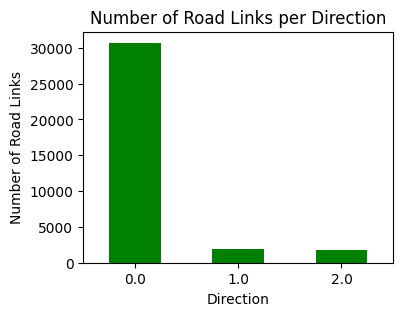

In [18]:
direction_counts = df.groupby('Direction').count()['Road_ID']

plt.figure(figsize=(4, 3))
direction_counts.plot(kind='bar', color='Green')
plt.title('Number of Road Links per Direction')
plt.xlabel('Direction')
plt.ylabel('Number of Road Links')
plt.xticks(rotation=0)
plt.show()